# Support Vector Machine

Find more about - Convex Optimization
sentdex - 26

Optimized a step!
Optimized a step!
Optimized a step!
[1 7]  :  1.224
[2 8]  :  1.224
[3 8]  :  1.0
[5 1]  :  1.016
[ 6 -1]  :  1.688
[7 3]  :  1.016


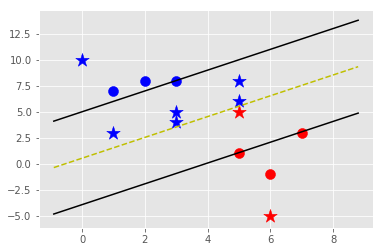

In [28]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

'''
We are creating a class because we do not want to
retrain our model for all the data points again
and again.
'''

'''
Support vector machine is a classification problem
and it all depends on finding the best value of w and b.
'''
class Support_Vector_Machine:
    def __init__(self, visualisation = True):
        self.visualisation = visualisation
        self.color = {1:'r', -1:'b'}
        if self.visualisation:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
          
    # to train the model
    def fit(self, data):
        self.data = data
        
        #{||w||: [w.b]}
        opt_dict = {
            
        }
        
        #Each vector we want to transoform our vector with
        #these all of these values
        transforms = [[1,1], [-1,1], [-1,-1], [1,-1]]
        
        all_data = []
        for yi in self.data:
            for feature_set in self.data[yi]:
                for feature in feature_set:
                    all_data.append(feature)
                    
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        '''
        
        '''
        step_sizes = [self.max_feature_value * 0.1,
                     self.max_feature_value * 0.01,
                     self.max_feature_value * 0.001]
        
        #extremely expensive
        b_range_multiple = 5
        '''
        We do not want to take as smaall of steps with b
        as we do with w
        '''
        b_multiple = 5
        
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            
            #we can do because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                  self.max_feature_value*b_range_multiple,
                                  step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        '''
                        weakest link in the SVM fundamentally
                        SMO attempts to fix this bit
                        '''
                        '''
                        constraint function : yi(xi.w+b) >= 1
                        '''
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    break
    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]
                            
                if w[0] < 0:
                    optimized = True
                    print('Optimized a step!') 
                else:
                    w = w - step
            
            norms = sorted([n for n in opt_dict])
            
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0] + step*2
            
        for i in self.data:
            for xi in self.data[i]:
                yi = i
                print(xi,' : ',yi*(np.dot(self.w,xi)+self.b))
            
                    
                    
    
    def predict(self, features):
        # sign(x.w+b)
        classification = np.sign(np.dot(np.array(features), self.w) + self.b)
        if classification !=0 and self.visualisation:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.color[classification])        
        
        return classification
    
    def visualize(self):
        [[self.ax.scatter(x[0], x[1], s=100, color=self.color[i]) for x in data_dict[i]] for i in data_dict]
        
        '''
        hyperplane = x.w+b
        v = x.w+b
        psv = 1
        nev = -1
        dec = 0
        '''
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v)/w[1]
        
        data_range = (self.min_feature_value*0.9, self.max_feature_value*1.1)
        hyp_x_min = data_range[0]
        hyp_x_max = data_range[1]
        
        '''
        Positive svm hyperplane
        w.x+b = 1
        '''
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'k')
        
        '''
        Negative svm hyperplane
        w.x+b = -1
        '''
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'k')
        
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--')
        
        plt.show()
        
        
        
        
data_dict = {
    -1:np.array([[1,7],[2,8],[3,8]]),
    1:np.array([[5,1],[6,-1],[7,3]]),
}

svm = Support_Vector_Machine()
svm.fit(data = data_dict)
predict_us = [[0, 10],[1,3],[3,4],[3,5],[5,5],[5,6],[6,-5],[5 ,8]]
for p in predict_us:
    svm.predict(p)
svm.visualize()

In [27]:
svm.predict([5,2])

1.0

Gotta run tests for different - 
    1. steps
    2. b_multiples
    3. etc...